<a href="https://colab.research.google.com/github/FredBrom/curso_pandas/blob/main/aula_10_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Aula 10-02-23

Aluno: Frederico Marx Brom Carneiro


*   Gráficos (matplotlib.pyplot)
*   Excel (openpyxl)




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
combustiveis_df = pd.read_excel('ca-2021-02.xlsx')

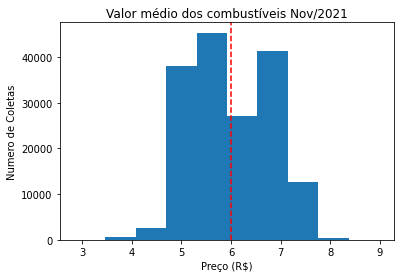

In [8]:
plt.hist(combustiveis_df['Valor de Venda'])
plt.title("Valor médio dos combustíveis Nov/2021")
plt.xlabel("Preço (R$)")
plt.ylabel("Numero de Coletas")
plt.axvline(x=combustiveis_df['Valor de Venda'].mean(), color='red', linestyle='--')

Produto
DIESEL                5.375682
DIESEL S10            5.454901
ETANOL                5.456115
GASOLINA              6.708741
GASOLINA ADITIVADA    6.860422
GNV                   4.392935
Name: Valor de Venda, dtype: float64

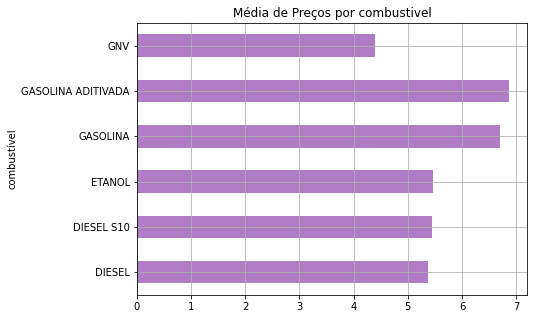

In [31]:
#Visualização do consumo médio
c_mean = combustiveis_df['Valor de Venda'].groupby(by=combustiveis_df['Produto']).mean()
display(c_mean)

plt.figure(figsize=(7,5))
c_mean.plot(kind='barh', xlabel='combustível', ylabel='Preço Por Litro (R$)', color='#8E44AD', title='Média de Preços por combustivel', alpha=0.7)
plt.grid()

In [32]:
##Personalizando a planilha do Excel

from openpyxl import load_workbook
from openpyxl.styles import PatternFill, Font, Color, Alignment

excel = 'por_litro.xlsx'

c_mean.to_excel(excel,'Sumario')

In [45]:
#Abrir o aqruivo Excel
wb = load_workbook(excel)
#Selecionar a Planilha atual
ws = wb['Sumario']

cinza = PatternFill('solid', fgColor='808080')
ws['A1'].fill=cinza
ws['B1'].fill=cinza

#onde o preço do combustivel for maior ou igual a 6.5 reais, pinta a fonte de vermelho
# e dexa negrito

num_linha = 2
while (num_linha <= ws.max_row):
  if ws['B'+str(num_linha)].value >= 6.5:
    ws['B'+str(num_linha)].font = Font(bold=True, color='FF0000', size=12)
  num_linha += 1
wb.save(excel)